# **Linear regression**

## Exploration Data analisis

In [612]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

### **Descripcion:**
Se han recopilado datos socio demográficos y de recursos de salud por condado en los Estados Unidos y queremos descubrir si existe alguna relación entre los recursos sanitarios y los datos socio demográficos.

### **Data import**

In [613]:
df = pd.read_csv('/workspaces/GuilloMansa-MachineLearning/data/raw/demographic_health_data.csv', sep=',')
df.head(5)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,7582,13.636445,7738,13.917016,5826,10.478229,4050,7.284042,2014,3.622237,42660,76.725239,10915,19.630942,267,0.480207,681,1.224798,62,0.111509,1016,1.827305,55601,158,455,11.8,9.6,2.2,0.0,0.7,0.6,4204,12119,10552,10291,11.3,32.6,28.4,27.7,7587,13.8,19.3,19.5,59338,53628,65048,25957,25015,942,3.6,59338,119.0,217.1,196.7,77.2,71.2,7.6,6.9,28.859137,6.085786,1.148905,25.992561,21.249061,72.142154,6,55036,10523,19.1,Autauga,Alabama,1,1,42438,47.6,45.4,49.4,20181,35.8,34.2,37.3,15193,7.9,7.2,8.7,3345,8.6,7.3,9.9,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,27338,12.539102,29986,13.753658,29932,13.728890,20936,9.602701,9368,4.296814,190301,87.285228,19492,8.940382,1684,0.772399,2508,1.150343,146,0.066966,3891,1.784682,218022,5403,2190,10.5,10.3,0.1,0.5,24.3,24.8,14310,40579,46025,46075,9.7,27.6,31.3,31.3,21069,9.8,13.9,13.1,57588,54437,60739,93849,90456,3393,3.6,57588,115.5,217.1,196.7,77.2,71.2,7.6,6.9,113.162114,23.863512,4.505074,101.921730,83.321572,282.882982,51,203360,53519,26.3,Baldwin,Alabama,1,3,170912,40.2,38.2,42.3,68790,29.7,28.4,31.0,50761,7.8,7.0,8.7,13414,8.6,7.2,10.1,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,3074,12.354809,3278,13.174712,3076,12.3

### **Analysis description**

**Variables**

- fips → Código único del condado según FIPS.

#### Identificación geográfica
fips: Código FIPS (Federal Information Processing Standards) único para cada condado en EE. UU.

COUNTY_NAME: Nombre del condado.

STATE_NAME: Nombre del estado.

STATE_FIPS: Código FIPS del estado.

CNTY_FIPS: Código FIPS del condado.

Urban_rural_code: Clasificación del condado según nivel de urbanización o ruralidad.

#### Demografía básica
TOT_POP: Población total.

0-9, 10-19, 20-29, …, 80+: Número de personas en cada grupo de edad.

0-9 y/o % of total pop, 10-19 y/o % of total pop, etc.: Porcentaje de la población total en cada grupo de edad.

White-alone pop, % White-alone: Número y porcentaje de población blanca no hispana.

Black-alone pop, % Black-alone: Número y porcentaje de población negra no hispana.

Native American/American Indian-alone pop, % NA/AI-alone: Número y porcentaje de población indígena.

Asian-alone pop, % Asian-alone: Número y porcentaje de población asiática.

Hawaiian/Pacific Islander-alone pop, % Hawaiian/PI-alone: Número y porcentaje de población nativa hawaiana o isleña del Pacífico.

Two or more races pop, % Two or more races: Número y porcentaje de población multirracial.

Total Population: Población total (otra fuente de estimación).

Population Aged 60+: Número de personas de 60 años o más.

Percent of Population Aged 60+: Porcentaje de población de 60 años o más.

county_pop2018_18 and older: Población de 18 años o más en 2018.

#### Estimaciones poblacionales y migración
POP_ESTIMATE_2018: Estimación de población en 2018.

N_POP_CHG_2018: Cambio neto de población en 2018.

GQ_ESTIMATES_2018: Estimaciones de población en viviendas colectivas (ej. prisiones, residencias).

R_birth_2018: Tasa de nacimientos en 2018.

R_death_2018: Tasa de muertes en 2018.

R_NATURAL_INC_2018: Crecimiento natural (nacimientos - muertes).

R_INTERNATIONAL_MIG_2018: Migración internacional neta.

R_DOMESTIC_MIG_2018: Migración doméstica neta (dentro de EE. UU.).

R_NET_MIG_2018: Migración neta total.

#### Educación
Less than a high school diploma 2014-18: Número de adultos sin diploma de secundaria.

High school diploma only 2014-18: Número de adultos con solo secundaria.

Some college or associate's degree 2014-18: Número de adultos con estudios universitarios incompletos o título técnico.

Bachelor's degree or higher 2014-18: Número de adultos con licenciatura o más.

Percent of adults …: Porcentajes correspondientes a cada nivel educativo.

#### Economía y pobreza
POVALL_2018: Número total de personas en pobreza.

PCTPOVALL_2018: Porcentaje de población en pobreza.

PCTPOV017_2018: Porcentaje de menores de 18 en pobreza.

PCTPOV517_2018: Porcentaje de menores de 5 a 17 en pobreza.

MEDHHINC_2018: Ingreso medio de los hogares en 2018.

CI90LBINC_2018 / CI90UBINC_2018: Intervalo de confianza (90%) para el ingreso medio.

Civilian_labor_force_2018: Fuerza laboral civil.

Employed_2018: Número de empleados.

Unemployed_2018: Número de desempleados.

Unemployment_rate_2018: Tasa de desempleo.

Median_Household_Income_2018: Ingreso medio de los hogares.

Med_HH_Income_Percent_of_State_Total_2018: Ingreso medio del condado como porcentaje del ingreso medio estatal.

#### Recursos de salud
Active Physicians per 100000 Population 2018 (AAMC): Médicos activos por cada 100 000 habitantes.

Total Active Patient Care Physicians per 100000 Population 2018 (AAMC): Médicos en atención directa por cada 100 000 habitantes.

Active Primary Care Physicians per 100000 Population 2018 (AAMC): Médicos de atención primaria por cada 100 000 habitantes.

Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC): Médicos de atención primaria en práctica clínica.

Active General Surgeons per 100000 Population 2018 (AAMC): Cirujanos generales por cada 100 000 habitantes.

Active Patient Care General Surgeons per 100000 Population 2018 (AAMC): Cirujanos generales en práctica clínica.

Total nurse practitioners (2019): Número total de enfermeros practicantes.

Total physician assistants (2019): Número total de asistentes médicos.

Total Hospitals (2019): Número total de hospitales.

Internal Medicine Primary Care (2019): Médicos de atención primaria en medicina interna.

Family Medicine/General Practice Primary Care (2019): Médicos de atención primaria en medicina familiar/general.

Total Specialist Physicians (2019): Número total de médicos especialistas.

ICU Beds_x: Número de camas de UCI.


#### Prevencion
anycondition_prevalence: Prevalencia de cualquier condición crónica.

anycondition_Lower 95% CI / Upper 95% CI: Intervalo de confianza del 95% para esa prevalencia.

anycondition_number: Número estimado de personas con alguna condición.

Obesity_prevalence, Obesity_number, CI: Prevalencia, número e intervalos de confianza para obesidad.

Heart disease_prevalence, Heart disease_number, CI: Prevalencia, número e intervalos de confianza para enfermedad cardíaca.

COPD_prevalence, COPD_number, CI: Prevalencia, número e intervalos de confianza para enfermedad pulmonar obstructiva crónica.

diabetes_prevalence, diabetes_number, CI: Prevalencia, número e intervalos de confianza para diabetes.

CKD_prevalence, CKD_number, CI: Prevalencia, número e intervalos de confianza para enfermedad renal crónica.

In [614]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


(None, (3140, 108))

In [615]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fips,3140.0,30401.640764,15150.559265,1001.0,18180.500000,29178.000000,45081.50000,5.604500e+04
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.250000,25800.500000,67913.00000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.0,1280.500000,3057.000000,8097.00000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.95184,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.0,1374.500000,3274.000000,8822.25000,1.239139e+06
...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,3.446242,0.568059,1.8,3.100000,3.400000,3.80000,6.200000e+00
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.900000,3.200000,3.50000,5.800000e+00
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.300000,3.700000,4.10000,6.600000e+00
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.750000,718.000000,1776.25000,2.377660e+05


In [616]:
df.duplicated().sum()

np.int64(0)

**Observaciones principales**
- Contiene 3140 filas y 108 columnas.
- Sin valores nulos.
- 106 numericos, 2 categoricos.

In [617]:
# Mostrar todas las columnas
pd.set_option("display.max_columns", None)

In [618]:
df = df.drop(["0-9", "19-Oct", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+", "White-alone pop", "Black-alone pop", "Native American/American Indian-alone pop", "Asian-alone pop",
              "Hawaiian/Pacific Islander-alone pop", "Two or more races pop", "Less than a high school diploma 2014-18", "High school diploma only 2014-18", "Some college or associate's degree 2014-18",
              "Bachelor's degree or higher 2014-18", "POP_ESTIMATE_2018", "N_POP_CHG_2018", "GQ_ESTIMATES_2018", "R_birth_2018", "R_death_2018", "R_NATURAL_INC_2018", "R_INTERNATIONAL_MIG_2018",
              "R_DOMESTIC_MIG_2018", "R_NET_MIG_2018", "POVALL_2018","PCTPOV017_2018", "PCTPOV517_2018", "CI90LBINC_2018", "CI90UBINC_2018", "Employed_2018", "Unemployed_2018", "Median_Household_Income_2018",
              "COUNTY_NAME", "STATE_NAME", "STATE_FIPS", "CNTY_FIPS", "anycondition_Lower 95% CI", "anycondition_Upper 95% CI", "Obesity_Lower 95% CI", "Obesity_Upper 95% CI", "Heart disease_Lower 95% CI",
              "Heart disease_Upper 95% CI", "COPD_Lower 95% CI", "COPD_Upper 95% CI", "diabetes_Lower 95% CI", "diabetes_Upper 95% CI", "CKD_Lower 95% CI", "CKD_Upper 95% CI"], axis = 1)

In [619]:
df.columns

Index(['fips', 'TOT_POP', '0-9 y/o % of total pop', '10-19 y/o % of total pop',
       '20-29 y/o % of total pop', '30-39 y/o % of total pop',
       '40-49 y/o % of total pop', '50-59 y/o % of total pop',
       '60-69 y/o % of total pop', '70-79 y/o % of total pop',
       '80+ y/o % of total pop', '% White-alone', '% Black-alone',
       '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone',
       '% Two or more races',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults completing some college or associate's degree 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'PCTPOVALL_2018', 'MEDHHINC_2018', 'Civilian_labor_force_2018',
       'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018',
       'Active Physicians per 100000 Population 2018 (AAMC)',
       'Total Active Patient Care Physicians per 100000 Populatio

#### **Obervaciones**:
> - Se eliminaron columnas duplicadas que mostraban la misma información en diferentes formatos.
> - Se conservaron solo porcentajes o versiones más informativas de las variables.
> - Se descartaron categorías demasiado específicas o redundantes (edad detallada, subgrupos raciales).
> - Se eliminaron identificadores como nombres de condado, estado y códigos FIPS.


> - El objetivo en general fue reducir ruido y enfocar el análisis en variables socio-demográficas y de salud relevantes.

In [620]:
age_columns = ["0-9 y/o % of total pop", "10-19 y/o % of total pop", "20-29 y/o % of total pop", "30-39 y/o % of total pop", "40-49 y/o % of total pop",
               "50-59 y/o % of total pop", "60-69 y/o % of total pop", "70-79 y/o % of total pop", "80+ y/o % of total pop", "Heart disease_prevalence"]

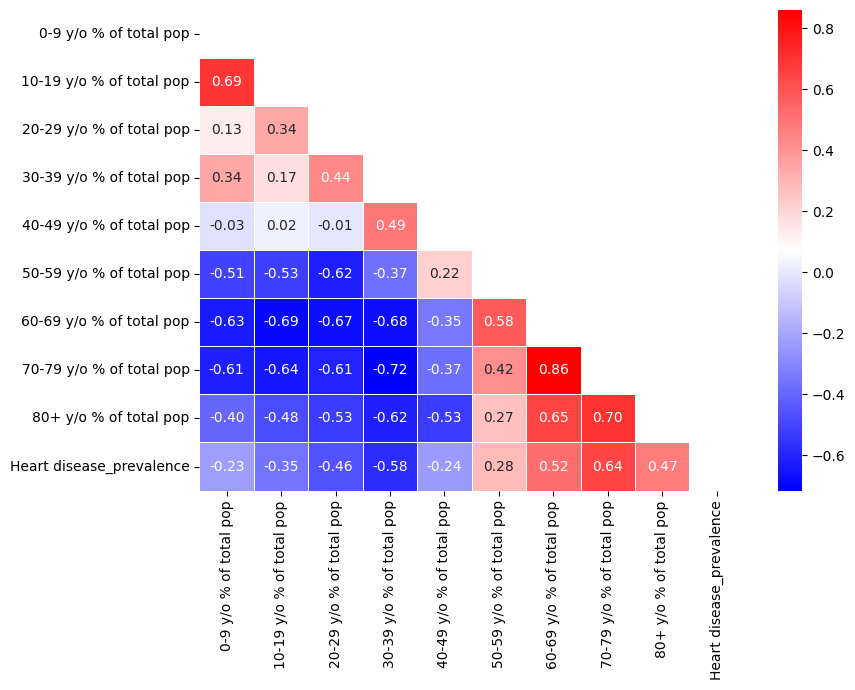

In [621]:
corr = df[age_columns].corr

corr = df[age_columns].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='bwr')

plt.tight_layout()
plt.show()

In [622]:
# Combine age groups into broader categories
df["age 0-19 pct %"] = df["0-9 y/o % of total pop"] + df["10-19 y/o % of total pop"]
df["age 20-39 pct %"] = df["20-29 y/o % of total pop"] + df["30-39 y/o % of total pop"]
df["age 40-59 pct %"] = df["40-49 y/o % of total pop"] + df["50-59 y/o % of total pop"]
df["age 60-79 pct %"] = df["60-69 y/o % of total pop"] + df["70-79 y/o % of total pop"]
df["age 80+ pct %"] = df["80+ y/o % of total pop"]

In [623]:
# Drop original age columns
age_columns_to_drop = ["0-9 y/o % of total pop", "10-19 y/o % of total pop", "20-29 y/o % of total pop", "30-39 y/o % of total pop", "40-49 y/o % of total pop",
                       "50-59 y/o % of total pop", "60-69 y/o % of total pop", "70-79 y/o % of total pop", "80+ y/o % of total pop"]

df = df.drop(age_columns_to_drop, axis = 1)

In [624]:
age_columns_to_corr = ["age 0-19 pct %","age 20-39 pct %","age 40-59 pct %","age 60-79 pct %","age 80+ pct %"]

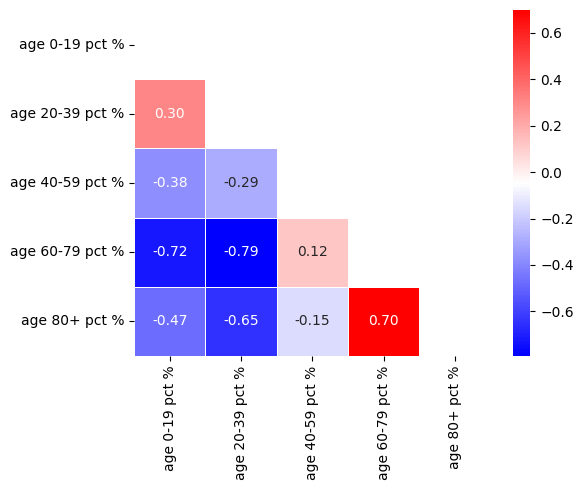

In [625]:
corr = df[age_columns_to_corr].corr

corr = df[age_columns_to_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='bwr')

plt.tight_layout()
plt.show()

In [626]:
df.columns

Index(['fips', 'TOT_POP', '% White-alone', '% Black-alone', '% NA/AI-alone',
       '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults completing some college or associate's degree 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'PCTPOVALL_2018', 'MEDHHINC_2018', 'Civilian_labor_force_2018',
       'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018',
       'Active Physicians per 100000 Population 2018 (AAMC)',
       'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
       'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Active General Surgeons per 100000 Population 2018 (AAMC)',
       'Active Patient Care General 

In [627]:
races = ['% White-alone', '% Black-alone', '% NA/AI-alone',
       '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races', 'Heart disease_prevalence']

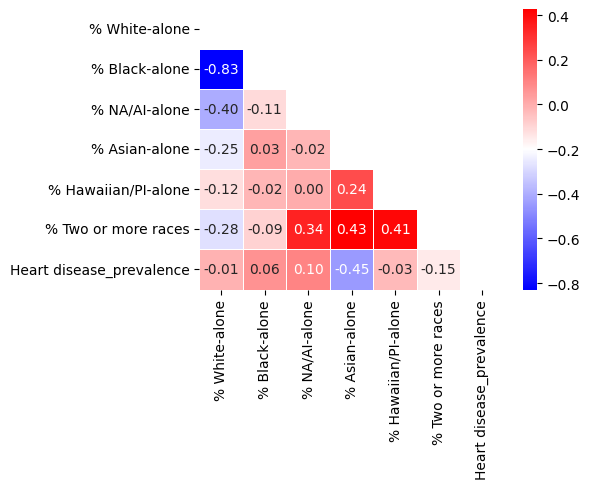

In [628]:
corr = df[races].corr

corr = df[races].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='bwr')

plt.tight_layout()
plt.show()

In [629]:
df.columns

Index(['fips', 'TOT_POP', '% White-alone', '% Black-alone', '% NA/AI-alone',
       '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races',
       'Percent of adults with less than a high school diploma 2014-18',
       'Percent of adults with a high school diploma only 2014-18',
       'Percent of adults completing some college or associate's degree 2014-18',
       'Percent of adults with a bachelor's degree or higher 2014-18',
       'PCTPOVALL_2018', 'MEDHHINC_2018', 'Civilian_labor_force_2018',
       'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018',
       'Active Physicians per 100000 Population 2018 (AAMC)',
       'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
       'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
       'Active General Surgeons per 100000 Population 2018 (AAMC)',
       'Active Patient Care General 

In [630]:
others = [ 'Total Population',
       'Population Aged 60+', 'Percent of Population Aged 60+',
       'county_pop2018_18 and older', 'anycondition_prevalence',
       'anycondition_number', 'Obesity_prevalence', 'Obesity_number', 'COPD_prevalence',
       'COPD_number', 'diabetes_prevalence', 'diabetes_number',
       'CKD_prevalence', 'CKD_number', 'Urban_rural_code', 'age 0-19 pct %',
       'age 20-39 pct %', 'age 40-59 pct %', 'age 60-79 pct %',
       'age 80+ pct %', 'Heart disease_number', 'Heart disease_prevalence']

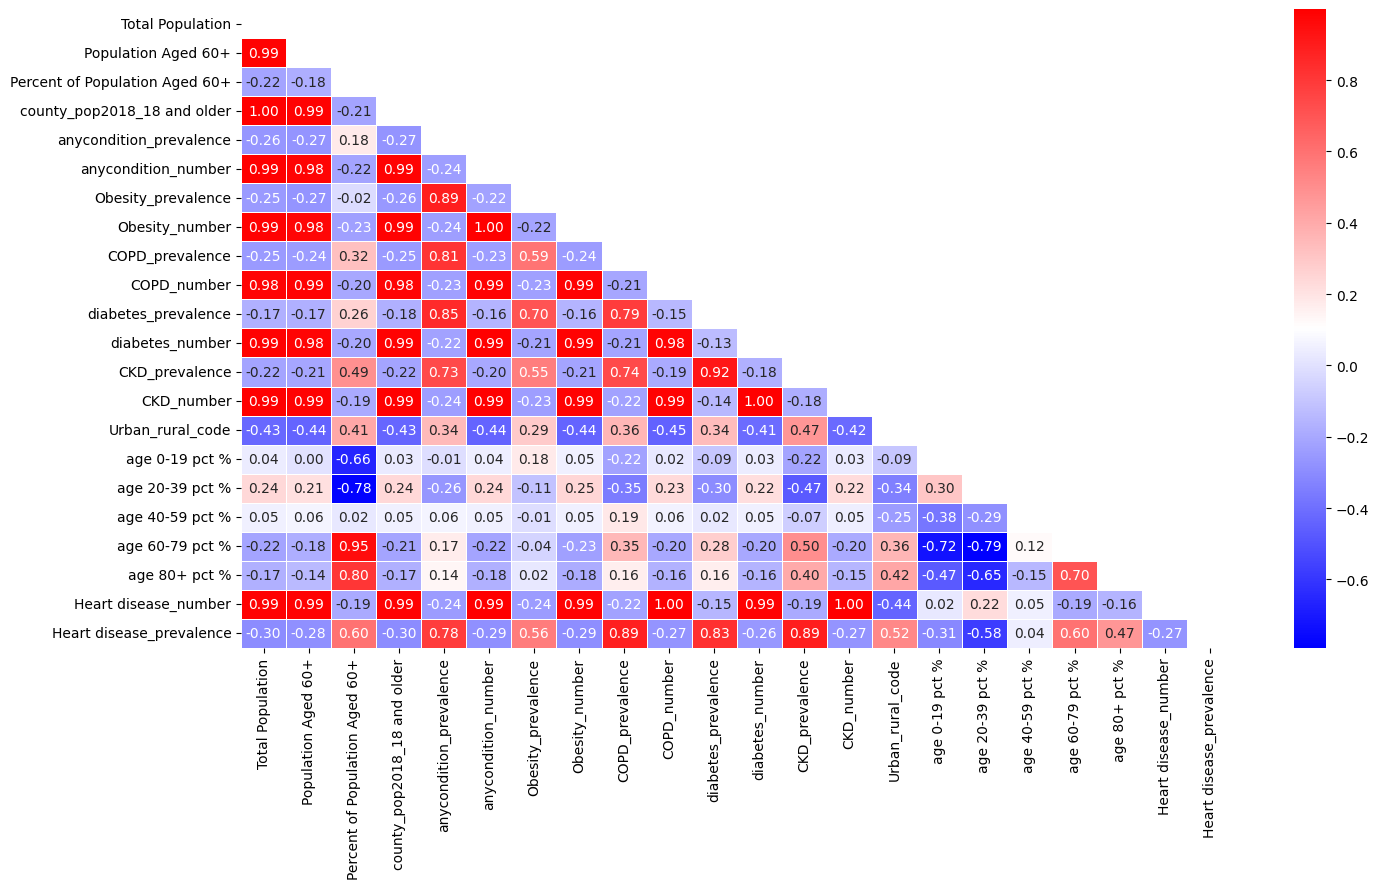

In [631]:
corr = df[others].corr

corr = df[others].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='bwr')

plt.tight_layout()
plt.show()

se eliminan datos que puedan afectar la prediccion del modelo. Como los _number y la poblacion duplicada de 0-18.

In [632]:
others_filter =  ['Percent of Population Aged 60+',
       'Obesity_prevalence', 'COPD_prevalence',
       'diabetes_prevalence', 
       'CKD_prevalence', 'Urban_rural_code', 'age 0-19 pct %',
       'age 20-39 pct %', 'age 40-59 pct %', 'age 60-79 pct %',
       'age 80+ pct %', 'Heart disease_prevalence']

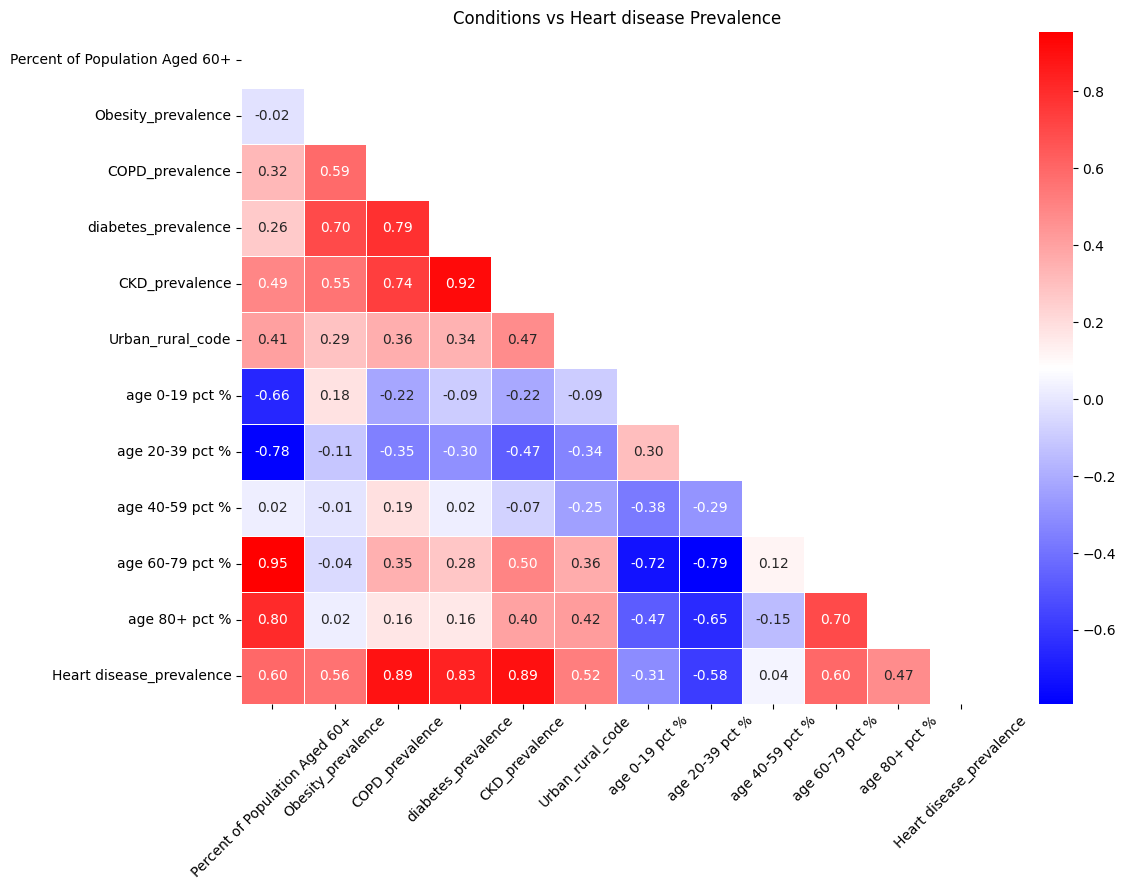

In [633]:
corr = df[others_filter].corr

corr = df[others_filter].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='bwr')
plt.title("Conditions vs Heart disease Prevalence")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [634]:
mixed =  ['anycondition_prevalence',
       'Obesity_prevalence', 'COPD_prevalence',
       'diabetes_prevalence', 
       'CKD_prevalence', 'Heart disease_prevalence']

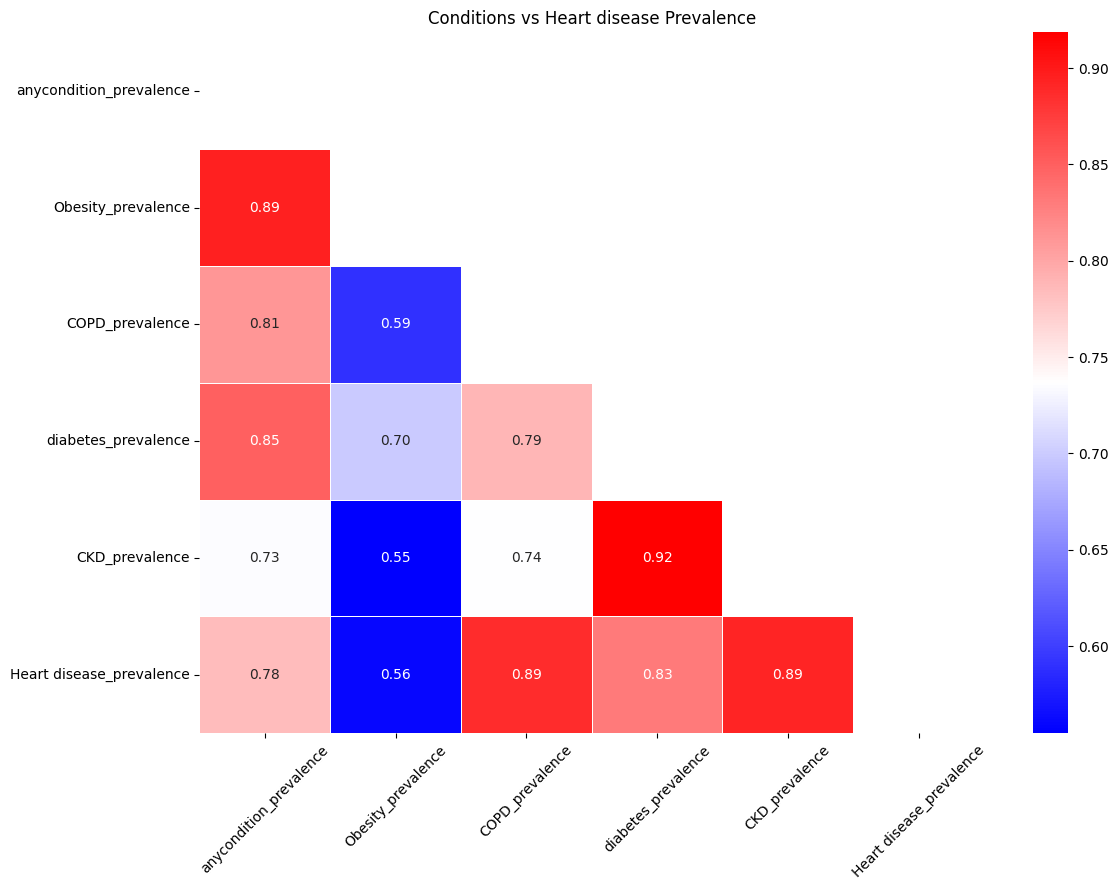

In [635]:
corr = df[mixed].corr

corr = df[mixed].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='bwr')
plt.title("Conditions vs Heart disease Prevalence")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [642]:
socioeco =['PCTPOVALL_2018 (AAMC)','MEDHHINC_2018','Heart disease_prevalence']

In [643]:
corr = df[socioeco].corr

corr = df[socioeco].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True, mask=mask, linewidths=0.5, fmt=".2f", cmap='bwr')
plt.title("Conditions vs Heart disease Prevalence")
plt.tight_layout()
plt.show()

KeyError: "['PCTPOVALL_2018 (AAMC)'] not in index"

In [ ]:
df.shape

(3140, 52)